### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor,ceil

print(np.__version__)

1.23.3


#### Building a 2D Features Dataset for Classification task

In [22]:
class_1_size = 1000
class_1_mean = 5
class_1_std = 2.1
x_1 = np.random.normal(loc=class_1_mean,scale=class_1_std, size=class_1_size) 
y_1 = np.random.normal(loc=class_1_mean,scale=class_1_std, size=class_1_size)  
class_1_target = np.full(class_1_size, 1)

print(f'X Shape {x_1.shape} Y Shape {y_1.shape} Targget Shape {class_1_target.shape}')

X Shape (1000,) Y Shape (1000,) Targget Shape (1000,)


#### Ploting the Features

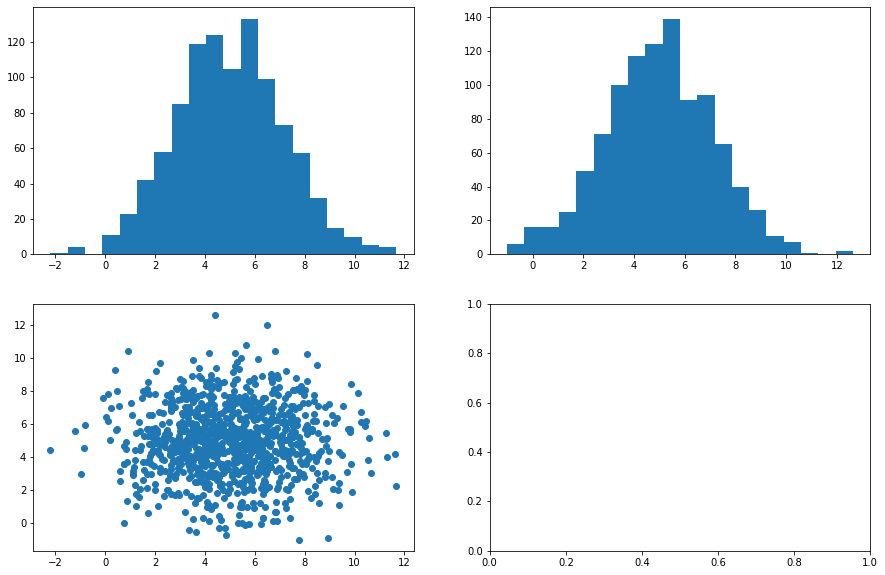

In [25]:
fig, (axes1, axes2) = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
_ = axes1[0].hist(x_1, bins=20)
_ = axes1[1].hist(y_1,  bins=20)
_ = axes2[0].scatter(x_1,y_1)
plt.show()
del fig, axes1, axes2

#### Creating data For Class 1 , Target = 0

In [17]:
class_1_size = 1000
class_1_mean = 5
class_1_std = 2.1
x_1 = np.random.normal(loc=class_1_mean,scale=class_1_std, size=class_1_size) 
y_1 = np.random.normal(loc=class_1_mean,scale=class_1_std, size=class_1_size)  
class_1_target = np.full(class_1_size, 0)

class_1_data = np.column_stack((x_1,y_1, class_1_target))

print(f'class_1_data {class_1_data.shape}')
print(class_1_data[:5])

del class_1_size,class_1_mean,class_1_std,x_1,y_1,class_1_target

class_1_data (1000, 3)
[[4.34970541 3.09222012 0.        ]
 [5.3692166  7.85469125 0.        ]
 [2.55661784 4.19068305 0.        ]
 [6.5112088  2.94676586 0.        ]
 [3.73410839 5.76101658 0.        ]]


#### Creating data For Class 2 , Target = 0

In [18]:
class_2_size = 1000
class_2_mean = 12
class_2_std = 1.75
x_2 = np.random.normal(loc=class_2_mean,scale=class_2_std, size=class_2_size) 
y_2 = np.random.normal(loc=class_2_mean,scale=class_2_std, size=class_2_size)  
class_2_target = np.full(class_2_size, 1)

class_2_data = np.column_stack((x_2,y_2, class_2_target))

print(f'class_2_data {class_2_data.shape}')
print(class_2_data[:5])

del class_2_size,class_2_mean,class_2_std,x_2,y_2,class_2_target

class_2_data (1000, 3)
[[14.46218388 11.90988658  1.        ]
 [ 9.22617764 10.42764187  1.        ]
 [12.30168935  9.7512444   1.        ]
 [11.29475164 11.5137148   1.        ]
 [10.59261218 12.61075577  1.        ]]


#### Concatebating class_1 and class_2 , Then Shuffling

In [30]:
dataset = np.vstack((class_1_data,class_2_data))

print(f'dataset {dataset.shape}')
print(dataset[:5])

np.random.shuffle(dataset)

print(f'dataset {dataset.shape}')
print(dataset[:5])

np.unique(dataset[:,2], return_counts=True)

dataset (2000, 3)
[[4.34970541 3.09222012 0.        ]
 [5.3692166  7.85469125 0.        ]
 [2.55661784 4.19068305 0.        ]
 [6.5112088  2.94676586 0.        ]
 [3.73410839 5.76101658 0.        ]]
dataset (2000, 3)
[[ 2.30781229  4.23671413  0.        ]
 [13.46099176  9.24793218  1.        ]
 [ 6.19242725  6.86039562  0.        ]
 [14.10676096 13.91470337  1.        ]
 [ 4.58983109  3.9903539   0.        ]]


(array([0., 1.]), array([1000, 1000], dtype=int64))

### Ploting  The dataset

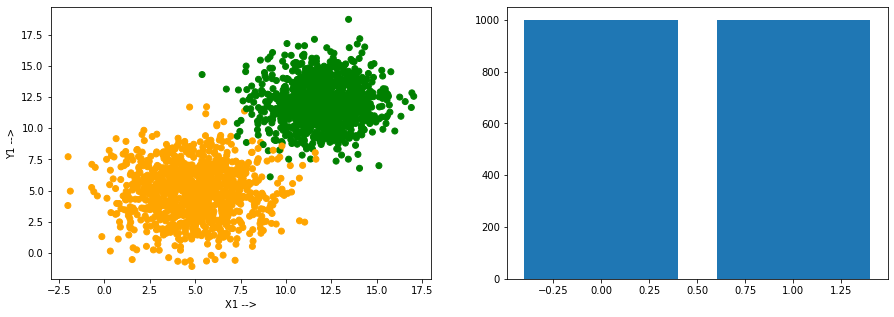

In [34]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

color = np.where(dataset[:,2] == 0, 'orange','green')

ax1.scatter(dataset[:,0],dataset[:,1], c = color)

ax1.set_xlabel('X1 -->')
ax1.set_ylabel('Y1 -->')

label, counts = np.unique(dataset[:,2], return_counts=True)

ax2.bar(label, counts)

plt.show()

del fig,ax1,ax2,color,label, counts

#### Test_train_split

In [38]:
np.random.shuffle(dataset)
num_of_observtions, num_predictors = dataset.shape
print(f'num_of_observtions {num_of_observtions}, num_predictors {num_predictors}')
test_train_ratio = 0.2
test_size = ceil(num_of_observtions * test_train_ratio)

test_data = dataset[:test_size]
train_data = dataset[test_size:]

print(f'test_data {test_data.shape} train_data {train_data.shape}')

del test_data,train_data

num_of_observtions 2000, num_predictors 3
test_data (400, 3) train_data (1600, 3)


In [42]:
def generate_binary_classification(size):
    class_1_size = ceil(size/2)
    class_2_size = size - class_1_size
    class_1_mean, class_1_std  = 5, 1.25
    class_2_mean, class_2_std  = 12.5, 2.25
    
    x_1 = np.random.normal(loc=class_1_mean,scale=class_1_std, size=class_1_size) 
    y_1 = np.random.normal(loc=class_1_mean,scale=class_1_std, size=class_1_size)  
    class_1_target = np.full(class_1_size, 0)
    class_1_data = np.column_stack((x_1,y_1, class_1_target))
    
    x_2 = np.random.normal(loc=class_2_mean,scale=class_2_std, size=class_2_size) 
    y_2 = np.random.normal(loc=class_2_mean,scale=class_2_std, size=class_2_size)  
    class_2_target = np.full(class_2_size, 1)
    class_2_data = np.column_stack((x_2,y_2, class_2_target))
    
    data = np.vstack((class_1_data,class_2_data))
    np.random.shuffle(data)
    
    return data
    

dataset (2000, 3)
[[ 6.15828927  4.48174783  0.        ]
 [ 4.70839363  4.64929642  0.        ]
 [ 5.26100079  6.31344275  0.        ]
 [10.53265332 15.74649703  1.        ]
 [ 5.47965174  3.55127841  0.        ]]


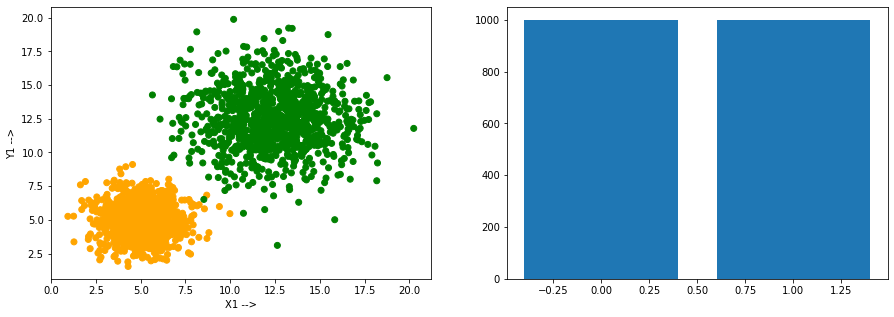

In [44]:
dataset = generate_binary_classification(2000)
print(f'dataset {dataset.shape}')
print(dataset[:5])

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

color = np.where(dataset[:,2] == 0, 'orange','green')

ax1.scatter(dataset[:,0],dataset[:,1], c = color)

ax1.set_xlabel('X1 -->')
ax1.set_ylabel('Y1 -->')

label, counts = np.unique(dataset[:,2], return_counts=True)

ax2.bar(label, counts)

plt.show()

del fig,ax1,ax2,color

In [45]:
def test_train_split(dataset,test_train_ratio = 0.2):
    np.random.shuffle(dataset)
    num_of_observtions, num_predictors = dataset.shape
    print(f'num_of_observtions {num_of_observtions}, num_predictors {num_predictors}')
    test_train_ratio = 0.2
    test_size = ceil(num_of_observtions * test_train_ratio)
    test_data = dataset[:test_size]
    train_data = dataset[test_size:]
    return train_data, test_data


In [46]:
train_data, test_data = test_train_split(dataset)
print(f'test_data {test_data.shape} train_data {train_data.shape}')

num_of_observtions 2000, num_predictors 3
test_data (400, 3) train_data (1600, 3)
